<a href="https://colab.research.google.com/github/charanhu/Skin_Cancer_Detection_MNIST/blob/main/Skin_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# Step 2: Loading data and Making labels

In [4]:
#Dataset used: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000

path='../Skin_Cancer_Detection_byAR(Akash)ST(Spandan)/archive/hmnist_28_28_RGB.csv'

In [5]:
df=pd.read_csv(path)

In [6]:
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


# Step 3: Train Test Split

In [7]:
fractions=np.array([0.8,0.2])

df=df.sample(frac=1)

train_set, test_set = np.array_split(df, (fractions[:-1].cumsum() * len(df)).astype(int))

In [8]:
print(len(train_set))

8012


In [9]:
print(len(test_set))

2003


In [10]:
df.label.unique()

array([4, 2, 0, 6, 1, 5, 3], dtype=int64)

In [11]:
# reference: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000/discussion/183083
classes={
    0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),
         
    1:('bcc' , 'basal cell carcinoma'),
         
    2:('bkl', 'benign keratosis-like lesions'),
         
    3:('df', 'dermatofibroma'),
         
    4:('nv', ' melanocytic nevi'),
         
    5:('vasc', ' pyogenic granulomas and hemorrhage'),
         
    6:('mel', 'melanoma'),
}

In [12]:
y_train=train_set['label']

x_train=train_set.drop(columns=['label'])

y_test=test_set['label']

x_test=test_set.drop(columns=['label'])

columns=list(x_train)

In [13]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cpu


# Step 4: Exploratory Data Analysis and Preprocessing

<Axes: ylabel='count'>

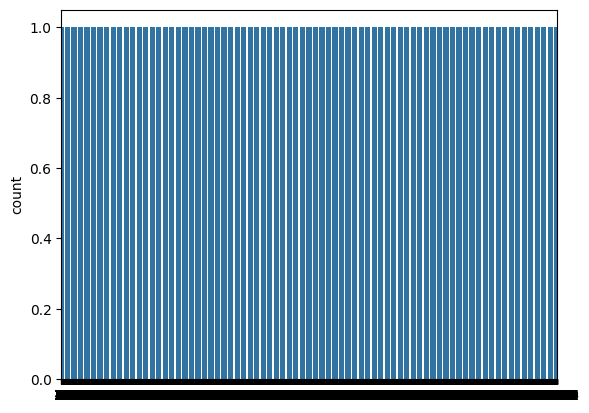

In [14]:
import seaborn as sns

sns.countplot(train_set['label'])

In [15]:
from imblearn.over_sampling import RandomOverSampler 

oversample = RandomOverSampler()

x_train,y_train  = oversample.fit_resample(x_train,y_train)

<Axes: ylabel='count'>

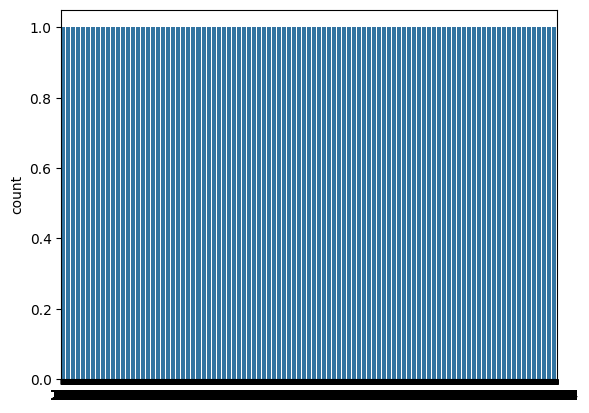

In [16]:
sns.countplot(y_train)

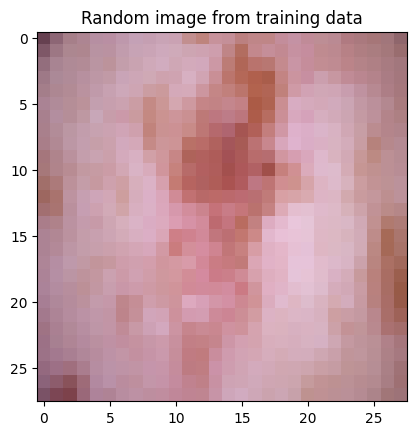

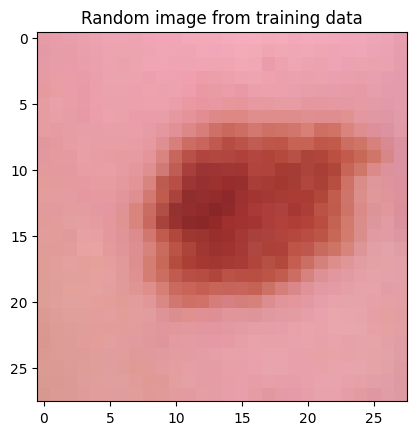

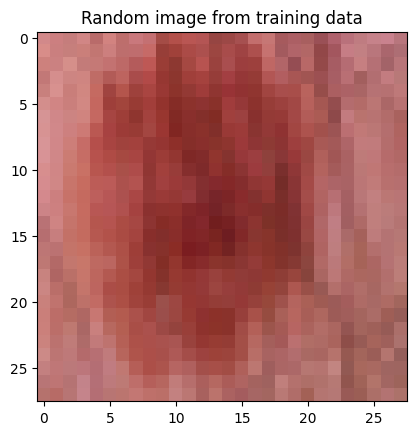

In [17]:
import matplotlib.pyplot as plt
import random

num=random.randint(0,8000)
x_train=np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()
num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

# Step 5: Model Building (CNN)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [19]:
#https://keras.io/api/models/sequential/
#https://keras.io/api/layers/core_layers/dense/
#https://keras.io/api/layers/merging_layers/add/
#https://keras.io/api/layers/convolution_layers/convolution2d
#https://keras.io/api/layers/convolution_layers/convolution2d
#https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization


%time 

model = Sequential()

model.add(Conv2D(16, 
                 kernel_size = (3,3), 
                 input_shape = (28, 28, 3), 
                 activation = 'relu', 
                 padding = 'same'))

model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(Conv2D(64, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(Conv2D(256, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

CPU times: total: 0 ns
Wall time: 0 ns
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 

# Step 6: Setting Optimizer & Annealing

---



In [20]:
#reference: https://www.kaggle.com/dhruv1234/ham10000-skin-disease-classification

callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                              monitor='val_acc', 
                                              mode='max',
                                              verbose=1,
                                              save_best_only=True)

In [21]:
%time 

optimizer=tf.keras.optimizers.Adam(lr=0.001)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =optimizer,
              metrics = ['accuracy'])

CPU times: total: 0 ns
Wall time: 0 ns


# Step 7: Fitting the model

In [22]:
from datetime import datetime

start_time = datetime.now()

history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 50,
                    shuffle=True,
                    callbacks=[callback])

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))

Epoch 1/50
235/235 [==============================] - ETA: 0s - loss: 1.2750 - accuracy: 0.5387WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 25s 87ms/step - loss: 1.2750 - accuracy: 0.5387 - val_loss: 2.1614 - val_accuracy: 0.1948
Epoch 2/50
235/235 [==============================] - ETA: 0s - loss: 0.4706 - accuracy: 0.8437WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 20s 87ms/step - loss: 0.4706 - accuracy: 0.8437 - val_loss: 1.7343 - val_accuracy: 0.3225
Epoch 3/50
235/235 [==============================] - ETA: 0s - loss: 0.2757 - accuracy: 0.9079WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 23s 97ms/step - loss: 0.2757 - accuracy: 0.9079 - val_loss: 1.3221 - val_accuracy: 0.4112
Epoch 4/50
235/235 [==============================] - ETA: 0s - loss: 0.2230 - accuracy: 0.9237WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 22s 93ms/step - loss: 0.2230 - accuracy: 0.9237 - val_loss: 0.8325 - val_accuracy: 0.5596
Epoch 5/50
235/235 [==============================] - ETA: 0s - loss: 0.1665 - accuracy: 0.9427WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 22s 94ms/step - loss: 0.1665 - accuracy: 0.9427 - val_loss: 1.1257 - val_accuracy: 0.4839
Epoch 6/50
235/235 [==============================] - ETA: 0s - loss: 0.1451 - accuracy: 0.9504WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 23s 96ms/step - loss: 0.1451 - accuracy: 0.9504 - val_loss: 0.8587 - val_accuracy: 0.6711
Epoch 7/50
235/235 [==============================] - ETA: 0s - loss: 0.1246 - accuracy: 0.9571WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 21s 91ms/step - loss: 0.1246 - accuracy: 0.9571 - val_loss: 0.8258 - val_accuracy: 0.6279
Epoch 8/50
235/235 [==============================] - ETA: 0s - loss: 0.1043 - accuracy: 0.9633WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 21s 90ms/step - loss: 0.1043 - accuracy: 0.9633 - val_loss: 0.9809 - val_accuracy: 0.5968
Epoch 9/50
235/235 [==============================] - ETA: 0s - loss: 0.1096 - accuracy: 0.9624WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 21s 90ms/step - loss: 0.1096 - accuracy: 0.9624 - val_loss: 1.5073 - val_accuracy: 0.4773
Epoch 10/50
235/235 [==============================] - ETA: 0s - loss: 0.0908 - accuracy: 0.9678WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 21s 88ms/step - loss: 0.0908 - accuracy: 0.9678 - val_loss: 0.6295 - val_accuracy: 0.7025
Epoch 11/50
235/235 [==============================] - ETA: 0s - loss: 0.0759 - accuracy: 0.9739WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 21s 88ms/step - loss: 0.0759 - accuracy: 0.9739 - val_loss: 0.5780 - val_accuracy: 0.7902
Epoch 12/50
235/235 [==============================] - ETA: 0s - loss: 0.0842 - accuracy: 0.9718WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 21s 89ms/step - loss: 0.0842 - accuracy: 0.9718 - val_loss: 0.4138 - val_accuracy: 0.8197
Epoch 13/50
235/235 [==============================] - ETA: 0s - loss: 0.0619 - accuracy: 0.9782WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 22s 94ms/step - loss: 0.0619 - accuracy: 0.9782 - val_loss: 0.7460 - val_accuracy: 0.6941
Epoch 14/50
235/235 [==============================] - ETA: 0s - loss: 0.0623 - accuracy: 0.9780WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 21s 90ms/step - loss: 0.0623 - accuracy: 0.9780 - val_loss: 0.1826 - val_accuracy: 0.9270
Epoch 15/50
235/235 [==============================] - ETA: 0s - loss: 0.0583 - accuracy: 0.9807WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 21s 89ms/step - loss: 0.0583 - accuracy: 0.9807 - val_loss: 0.2223 - val_accuracy: 0.9020
Epoch 16/50
235/235 [==============================] - ETA: 0s - loss: 0.0568 - accuracy: 0.9807WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 21s 89ms/step - loss: 0.0568 - accuracy: 0.9807 - val_loss: 0.7182 - val_accuracy: 0.7207
Epoch 17/50
235/235 [==============================] - ETA: 0s - loss: 0.0434 - accuracy: 0.9849WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 21s 89ms/step - loss: 0.0434 - accuracy: 0.9849 - val_loss: 1.2504 - val_accuracy: 0.6513
Epoch 18/50
235/235 [==============================] - ETA: 0s - loss: 0.0311 - accuracy: 0.9899WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 21s 87ms/step - loss: 0.0311 - accuracy: 0.9899 - val_loss: 0.0908 - val_accuracy: 0.9632
Epoch 19/50
235/235 [==============================] - ETA: 0s - loss: 0.0477 - accuracy: 0.9841WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 22s 92ms/step - loss: 0.0477 - accuracy: 0.9841 - val_loss: 0.3427 - val_accuracy: 0.8600
Epoch 20/50
235/235 [==============================] - ETA: 0s - loss: 0.0466 - accuracy: 0.9845WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 21s 89ms/step - loss: 0.0466 - accuracy: 0.9845 - val_loss: 0.1588 - val_accuracy: 0.9322
Epoch 21/50
235/235 [==============================] - ETA: 0s - loss: 0.0379 - accuracy: 0.9869WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 21s 88ms/step - loss: 0.0379 - accuracy: 0.9869 - val_loss: 0.1641 - val_accuracy: 0.9352
Epoch 22/50
235/235 [==============================] - ETA: 0s - loss: 0.0363 - accuracy: 0.9878WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 82ms/step - loss: 0.0363 - accuracy: 0.9878 - val_loss: 0.2074 - val_accuracy: 0.9266
Epoch 23/50
235/235 [==============================] - ETA: 0s - loss: 0.0410 - accuracy: 0.9868WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 81ms/step - loss: 0.0410 - accuracy: 0.9868 - val_loss: 0.2942 - val_accuracy: 0.8906
Epoch 24/50
235/235 [==============================] - ETA: 0s - loss: 0.0376 - accuracy: 0.9876WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 80ms/step - loss: 0.0376 - accuracy: 0.9876 - val_loss: 0.3760 - val_accuracy: 0.8640
Epoch 25/50
235/235 [==============================] - ETA: 0s - loss: 0.0307 - accuracy: 0.9897WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 81ms/step - loss: 0.0307 - accuracy: 0.9897 - val_loss: 0.9904 - val_accuracy: 0.7118
Epoch 26/50
235/235 [==============================] - ETA: 0s - loss: 0.0249 - accuracy: 0.9921WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 81ms/step - loss: 0.0249 - accuracy: 0.9921 - val_loss: 0.9796 - val_accuracy: 0.6774
Epoch 27/50
235/235 [==============================] - ETA: 0s - loss: 0.0272 - accuracy: 0.9911WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 82ms/step - loss: 0.0272 - accuracy: 0.9911 - val_loss: 0.3071 - val_accuracy: 0.9009
Epoch 28/50
235/235 [==============================] - ETA: 0s - loss: 0.0293 - accuracy: 0.9901WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 81ms/step - loss: 0.0293 - accuracy: 0.9901 - val_loss: 0.2994 - val_accuracy: 0.8939
Epoch 29/50
235/235 [==============================] - ETA: 0s - loss: 0.0291 - accuracy: 0.9909WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 81ms/step - loss: 0.0291 - accuracy: 0.9909 - val_loss: 0.2764 - val_accuracy: 0.8872
Epoch 30/50
235/235 [==============================] - ETA: 0s - loss: 0.0186 - accuracy: 0.9942WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 82ms/step - loss: 0.0186 - accuracy: 0.9942 - val_loss: 0.0411 - val_accuracy: 0.9887
Epoch 31/50
235/235 [==============================] - ETA: 0s - loss: 0.0253 - accuracy: 0.9923WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 22s 93ms/step - loss: 0.0253 - accuracy: 0.9923 - val_loss: 0.5290 - val_accuracy: 0.8581
Epoch 32/50
235/235 [==============================] - ETA: 0s - loss: 0.0212 - accuracy: 0.9935WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 83ms/step - loss: 0.0212 - accuracy: 0.9935 - val_loss: 0.4634 - val_accuracy: 0.8440
Epoch 33/50
235/235 [==============================] - ETA: 0s - loss: 0.0198 - accuracy: 0.9934WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 80ms/step - loss: 0.0198 - accuracy: 0.9934 - val_loss: 0.6130 - val_accuracy: 0.8140
Epoch 34/50
235/235 [==============================] - ETA: 0s - loss: 0.0207 - accuracy: 0.9933WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 79ms/step - loss: 0.0207 - accuracy: 0.9933 - val_loss: 0.6249 - val_accuracy: 0.8231
Epoch 35/50
235/235 [==============================] - ETA: 0s - loss: 0.0255 - accuracy: 0.9916WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 80ms/step - loss: 0.0255 - accuracy: 0.9916 - val_loss: 0.5309 - val_accuracy: 0.8112
Epoch 36/50
235/235 [==============================] - ETA: 0s - loss: 0.0216 - accuracy: 0.9933WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 80ms/step - loss: 0.0216 - accuracy: 0.9933 - val_loss: 0.4262 - val_accuracy: 0.8758
Epoch 37/50
235/235 [==============================] - ETA: 0s - loss: 0.0259 - accuracy: 0.9920WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 79ms/step - loss: 0.0259 - accuracy: 0.9920 - val_loss: 0.1523 - val_accuracy: 0.9435
Epoch 38/50
235/235 [==============================] - ETA: 0s - loss: 0.0170 - accuracy: 0.9945WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 80ms/step - loss: 0.0170 - accuracy: 0.9945 - val_loss: 0.0419 - val_accuracy: 0.9883
Epoch 39/50
235/235 [==============================] - ETA: 0s - loss: 0.0189 - accuracy: 0.9943WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 18s 78ms/step - loss: 0.0189 - accuracy: 0.9943 - val_loss: 1.0962 - val_accuracy: 0.7493
Epoch 40/50
235/235 [==============================] - ETA: 0s - loss: 0.0176 - accuracy: 0.9944WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 18s 79ms/step - loss: 0.0176 - accuracy: 0.9944 - val_loss: 0.4545 - val_accuracy: 0.8612
Epoch 41/50
235/235 [==============================] - ETA: 0s - loss: 0.0143 - accuracy: 0.9954WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 80ms/step - loss: 0.0143 - accuracy: 0.9954 - val_loss: 0.1272 - val_accuracy: 0.9613
Epoch 42/50
235/235 [==============================] - ETA: 0s - loss: 0.0126 - accuracy: 0.9967WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 21s 88ms/step - loss: 0.0126 - accuracy: 0.9967 - val_loss: 0.1647 - val_accuracy: 0.9436
Epoch 43/50
235/235 [==============================] - ETA: 0s - loss: 0.0167 - accuracy: 0.9948WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 82ms/step - loss: 0.0167 - accuracy: 0.9948 - val_loss: 0.0153 - val_accuracy: 0.9939
Epoch 44/50
235/235 [==============================] - ETA: 0s - loss: 0.0118 - accuracy: 0.9968WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 80ms/step - loss: 0.0118 - accuracy: 0.9968 - val_loss: 0.9231 - val_accuracy: 0.7895
Epoch 45/50
235/235 [==============================] - ETA: 0s - loss: 0.0196 - accuracy: 0.9935WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 80ms/step - loss: 0.0196 - accuracy: 0.9935 - val_loss: 0.0521 - val_accuracy: 0.9828
Epoch 46/50
235/235 [==============================] - ETA: 0s - loss: 0.0177 - accuracy: 0.9948WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 80ms/step - loss: 0.0177 - accuracy: 0.9948 - val_loss: 0.1695 - val_accuracy: 0.9460
Epoch 47/50
235/235 [==============================] - ETA: 0s - loss: 0.0102 - accuracy: 0.9966WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 80ms/step - loss: 0.0102 - accuracy: 0.9966 - val_loss: 0.0143 - val_accuracy: 0.9957
Epoch 48/50
235/235 [==============================] - ETA: 0s - loss: 0.0142 - accuracy: 0.9961WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 79ms/step - loss: 0.0142 - accuracy: 0.9961 - val_loss: 0.2501 - val_accuracy: 0.9178
Epoch 49/50
235/235 [==============================] - ETA: 0s - loss: 0.0221 - accuracy: 0.9933WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 81ms/step - loss: 0.0221 - accuracy: 0.9933 - val_loss: 0.3417 - val_accuracy: 0.9032
Epoch 50/50
235/235 [==============================] - ETA: 0s - loss: 0.0130 - accuracy: 0.9958WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 80ms/step - loss: 0.0130 - accuracy: 0.9958 - val_loss: 0.0956 - val_accuracy: 0.9649
Duration: 0:16:43.482291


# Step 8: Model Evaluation

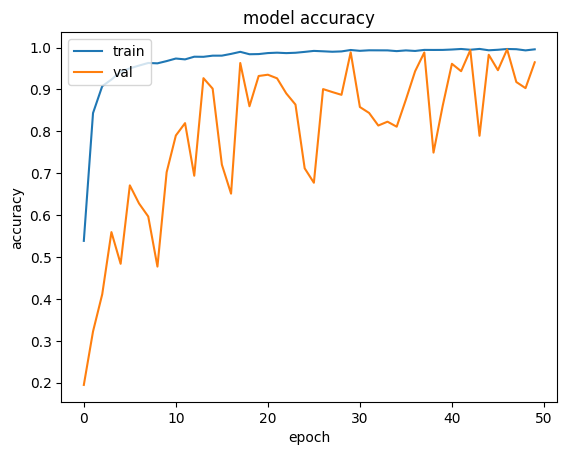

In [23]:
#plot of accuracy vs epoch

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

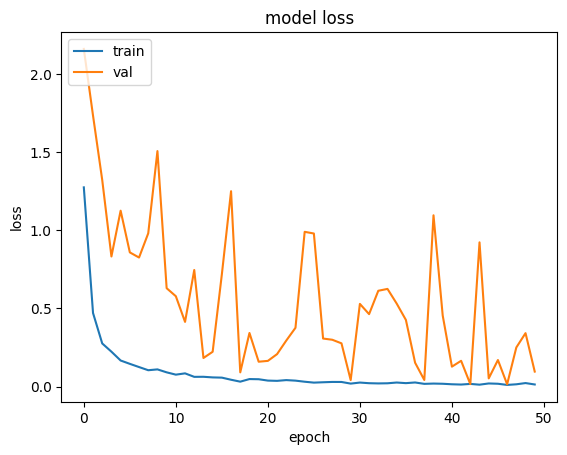

In [24]:
#plot of loss vs epoch

plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [25]:
model.load_weights('best_model.h5')

In [26]:
x_test=np.array(x_test).reshape(-1,28,28,3)

loss, acc = model.evaluate(x_test, y_test, verbose=2)

63/63 - 1s - loss: 0.1923 - accuracy: 0.9561 - 1s/epoch - 17ms/step


In [27]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

conf_mat = confusion_matrix(y_test, y_pred)


63/63 [==============================] - 1s 13ms/step


In [28]:
print(conf_mat)

[[  60    2    1    1    1    0    1]
 [   0   93    2    0    1    0    0]
 [   0    0  220    0   14    0    0]
 [   0    1    0   21    0    0    0]
 [   1    6   17    0 1303    0    7]
 [   0    0    1    0    0   20    0]
 [   0    2    7    0   22    1  198]]


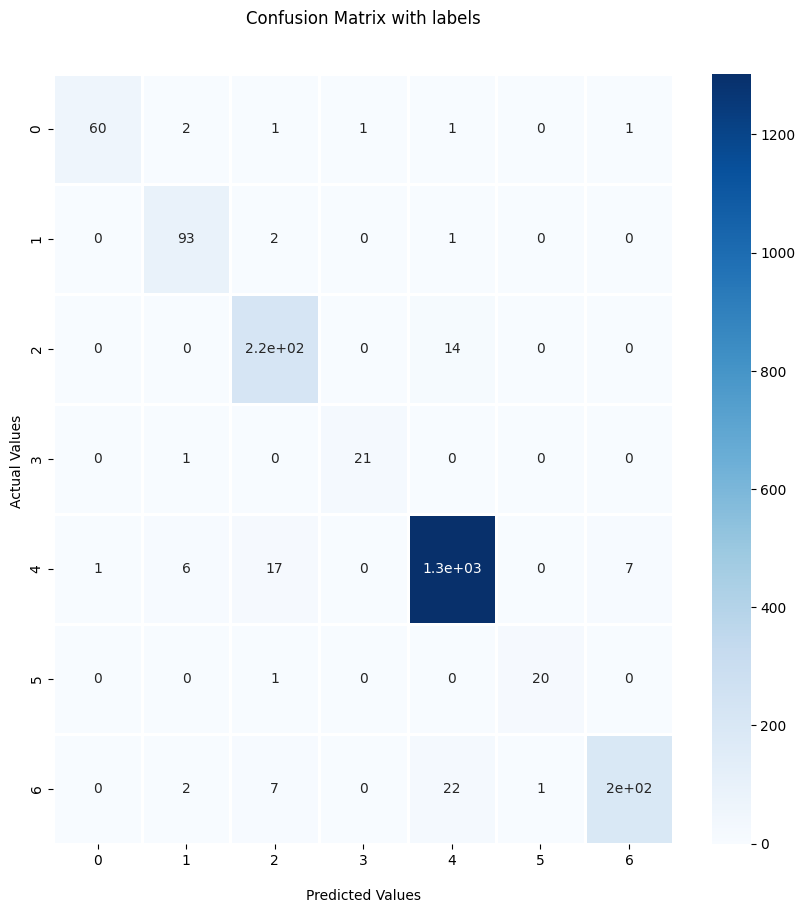

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10)) 


ax = sns.heatmap(conf_mat, annot=True, cmap='Blues', linewidths=.9, ax=ax)

ax.set_title('Confusion Matrix with labels\n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])

ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])

plt.show()

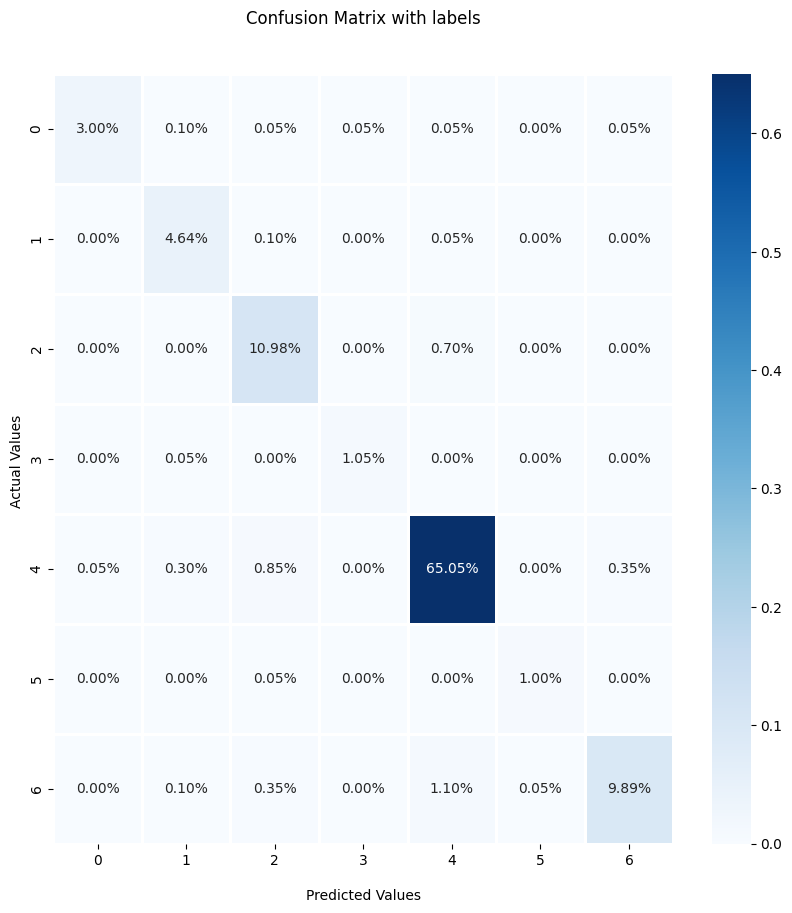

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10)) 


ax = sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='.2%', cmap='Blues', linewidths=.9, ax=ax)

ax.set_title('Confusion Matrix with labels\n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])

ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])

plt.show()

In [32]:
#https://pillow.readthedocs.io/en/stable/

import PIL

image=PIL.Image.open('test.jpg')

image=image.resize((28,28))

img=x_test[1]

img=np.array(image).reshape(-1,28,28,3)

result=model.predict(img)

print(result[0])

result=result.tolist()

max_prob=max(result[0])

class_ind=result[0].index(max_prob)

print(classes[class_ind])

1/1 [==============================] - 0s 191ms/step
[3.2271695e-05 2.5280108e-04 1.1521416e-03 8.5902306e-05 9.9383920e-01
 5.5271023e-05 4.5823823e-03]
('nv', ' melanocytic nevi')
